In [92]:
import pandas as pd

# Estimate!!Households!!Mean income (dollars)
df = pd.read_csv("./census_tract_data/Income/ACSST5Y2019.S1901_data_with_overlays_2021-03-29T072928.csv", usecols=['GEO_ID', 'NAME', 'S1901_C01_012E', 'S1901_C01_013E'])
df = df[1:]  # 除去第一行
df.head()
# S1901_C01_012E = Estimate!!Households!!Median income (dollars)
# S1901_C01_013E = Estimate!!Households!!Mean income (dollars)

,GEO_ID,NAME,S1901_C01_012E,S1901_C01_013E
1,1400000US25001010100,"Census Tract 101, Barnstable County, Massachus...",59063,99735
2,1400000US25001010206,"Census Tract 102.06, Barnstable County, Massac...",74639,92081
3,1400000US25001010208,"Census Tract 102.08, Barnstable County, Massac...",68367,81766
4,1400000US25001010304,"Census Tract 103.04, Barnstable County, Massac...",85263,113038
5,1400000US25001010306,"Census Tract 103.06, Barnstable County, Massac...",70071,78411


<AxesSubplot:xlabel='S1901_C01_013E', ylabel='Density'>

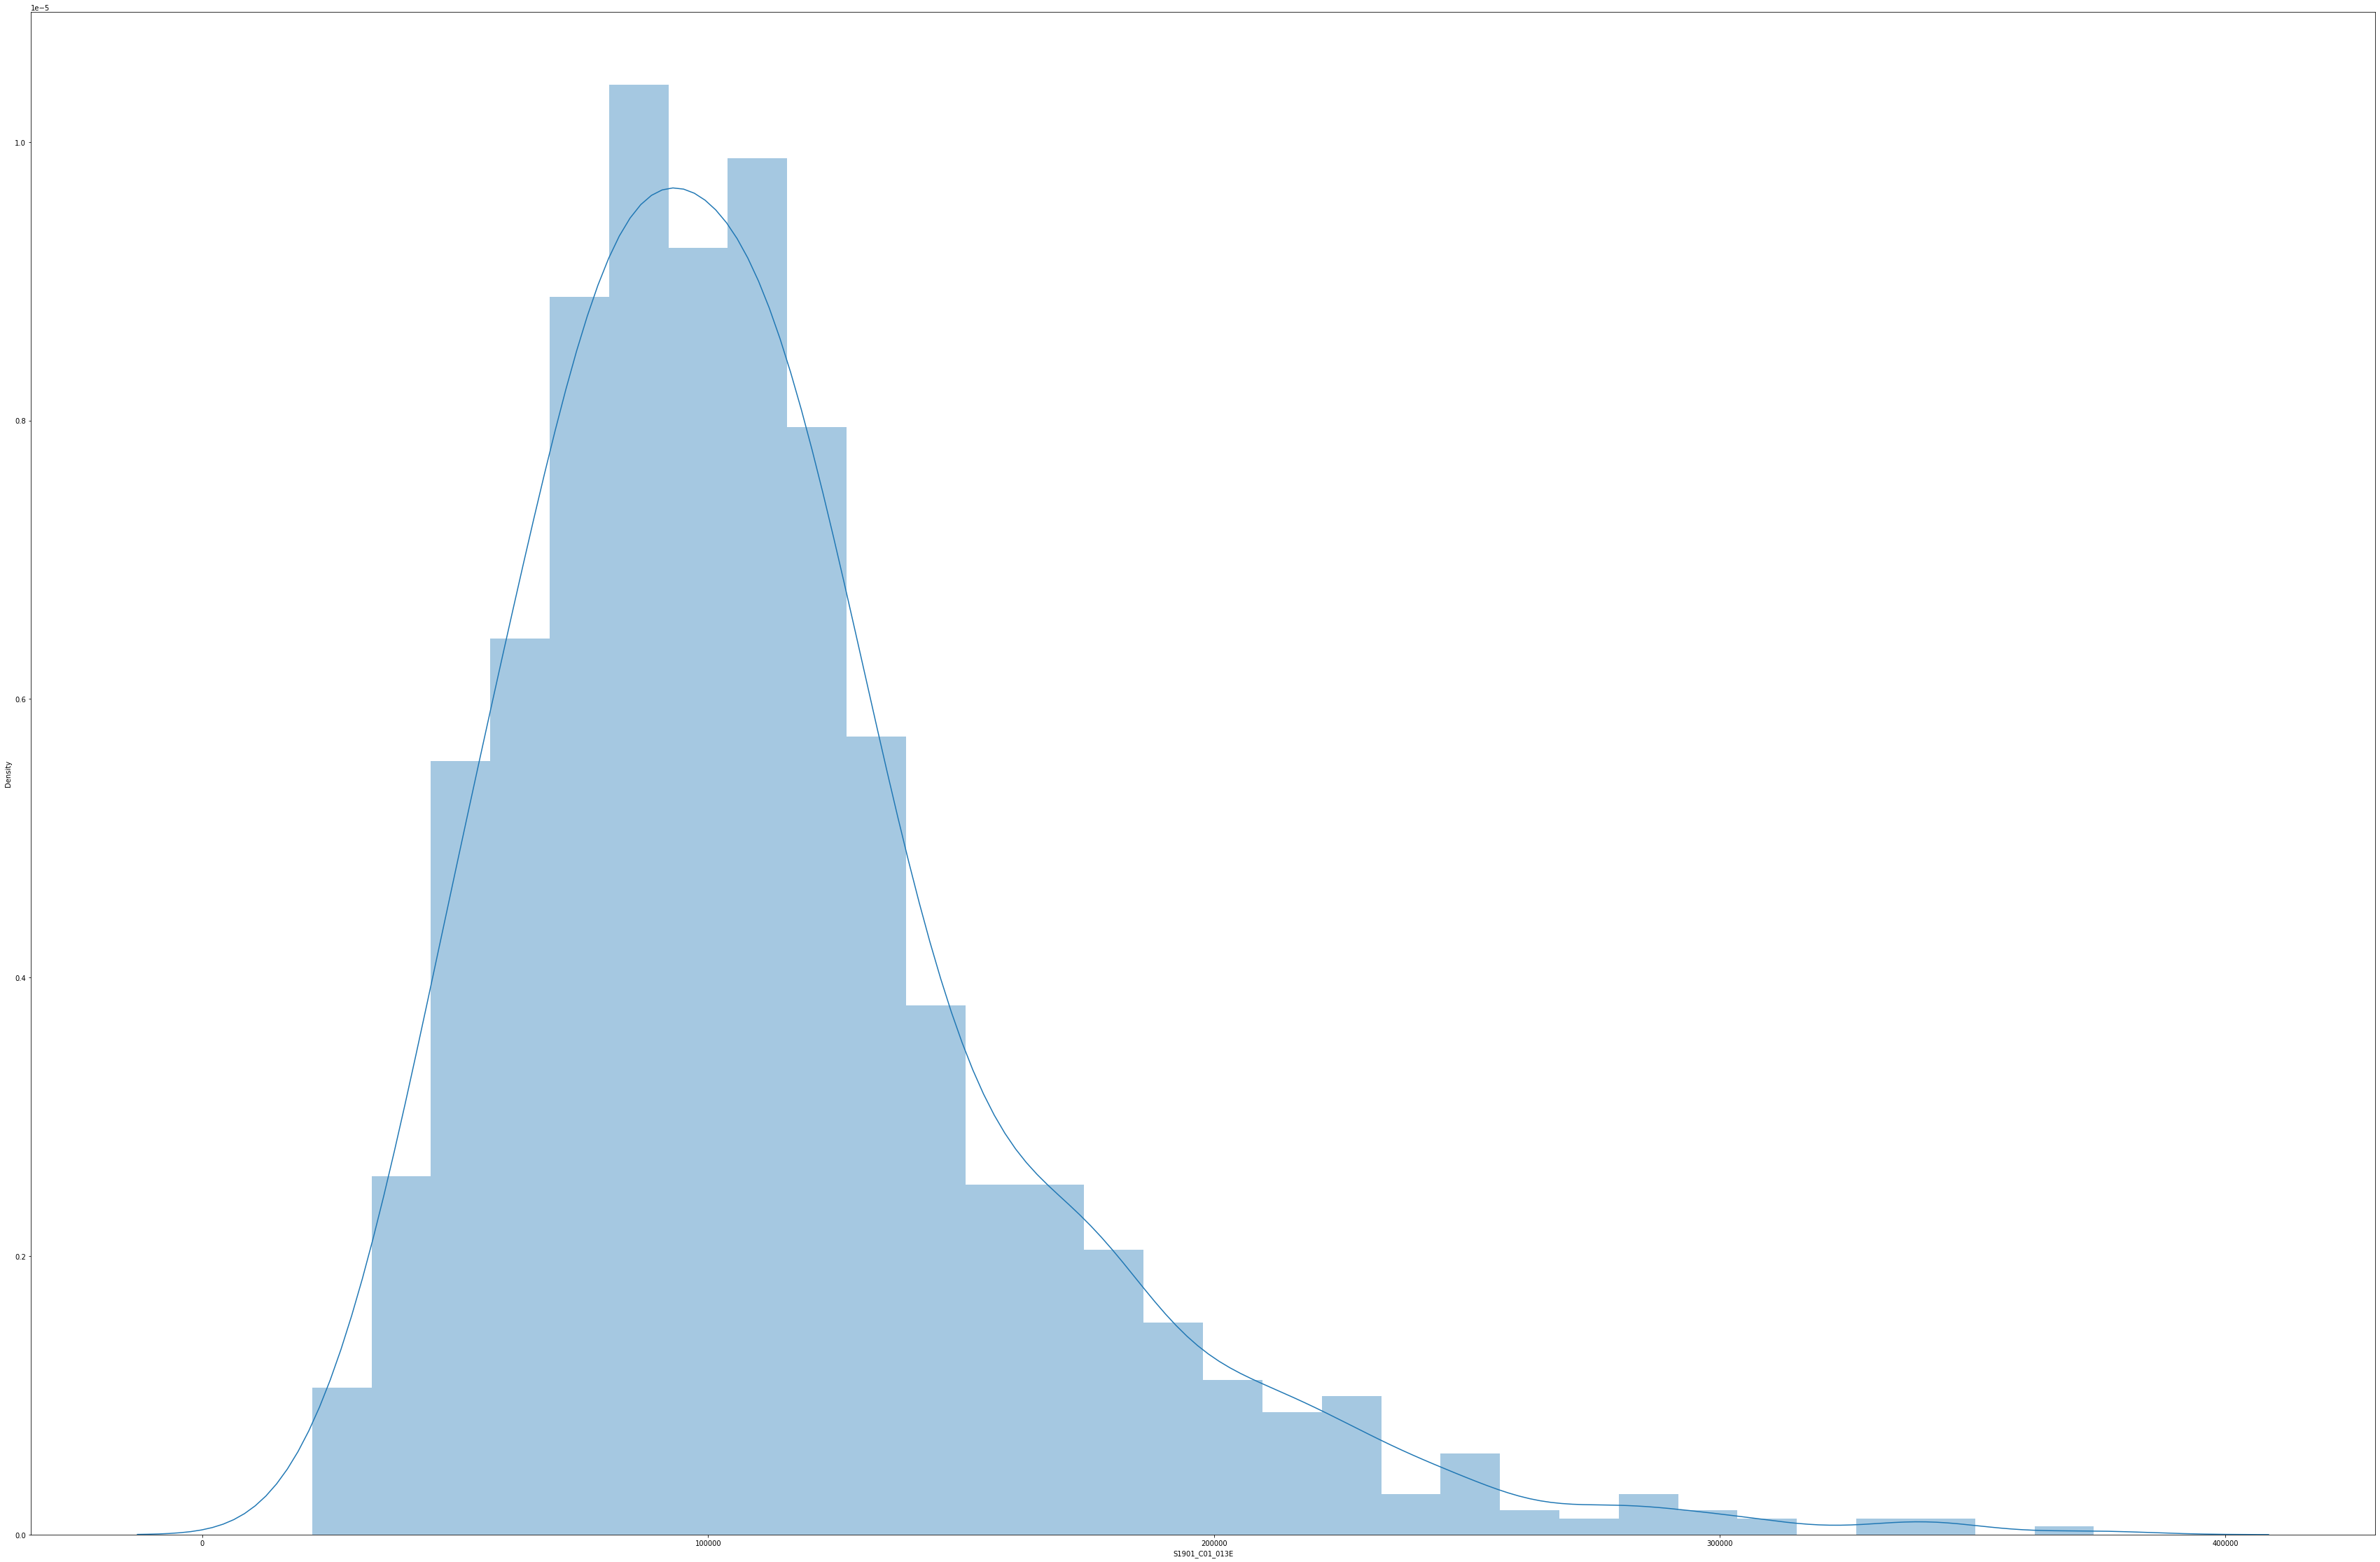

In [40]:
import seaborn as sns
sns.distplot(df.S1901_C01_013E,bins=30)

In [39]:
# RUN THIS CELL FIRST or the notebook won't work
import numpy as np
import geopandas as gpd
from IPython.display import display
import matplotlib.pyplot as plt

# These help the maps display nicely in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = [60, 40]

# This line tells iPython to not display warnings.
import warnings
warnings.filterwarnings('ignore')

In [93]:
mass = gpd.read_file("./cb_2018_25_tract_500k/cb_2018_25_tract_500k.shp")
print(mass)

     STATEFP COUNTYFP TRACTCE              AFFGEOID        GEOID     NAME  \
0         25      009  202102  1400000US25009202102  25009202102  2021.02   
1         25      009  205100  1400000US25009205100  25009205100     2051   
2         25      017  339400  1400000US25017339400  25017339400     3394   
3         25      017  342101  1400000US25017342101  25017342101  3421.01   
4         25      017  351000  1400000US25017351000  25017351000     3510   
...      ...      ...     ...                   ...          ...      ...   
1470      25      005  641200  1400000US25005641200  25005641200     6412   
1471      25      005  642200  1400000US25005642200  25005642200     6422   
1472      25      009  203100  1400000US25009203100  25009203100     2031   
1473      25      027  705100  1400000US25027705100  25027705100     7051   
1474      25      027  709202  1400000US25027709202  25027709202  7092.02   

     LSAD     ALAND   AWATER  \
0      CT   2919051    24048   
1      CT  

In [95]:
mass = pd.merge(mass, df, left_on='AFFGEOID', right_on='GEO_ID')
print(mass.columns)

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'AFFGEOID', 'GEOID', 'NAME_x', 'LSAD',
       'ALAND', 'AWATER', 'geometry', 'GEO_ID', 'NAME_y', 'S1901_C01_012E',
       'S1901_C01_013E'],
      dtype='object')


In [ ]:
def to_float(string):
    if string.isdigit():
        return int(string)
    
mass['S1901_C01_012E'] = mass.S1901_C01_012E.apply(to_float)
mass['S1901_C01_013E'] = mass.S1901_C01_013E.apply(to_float)

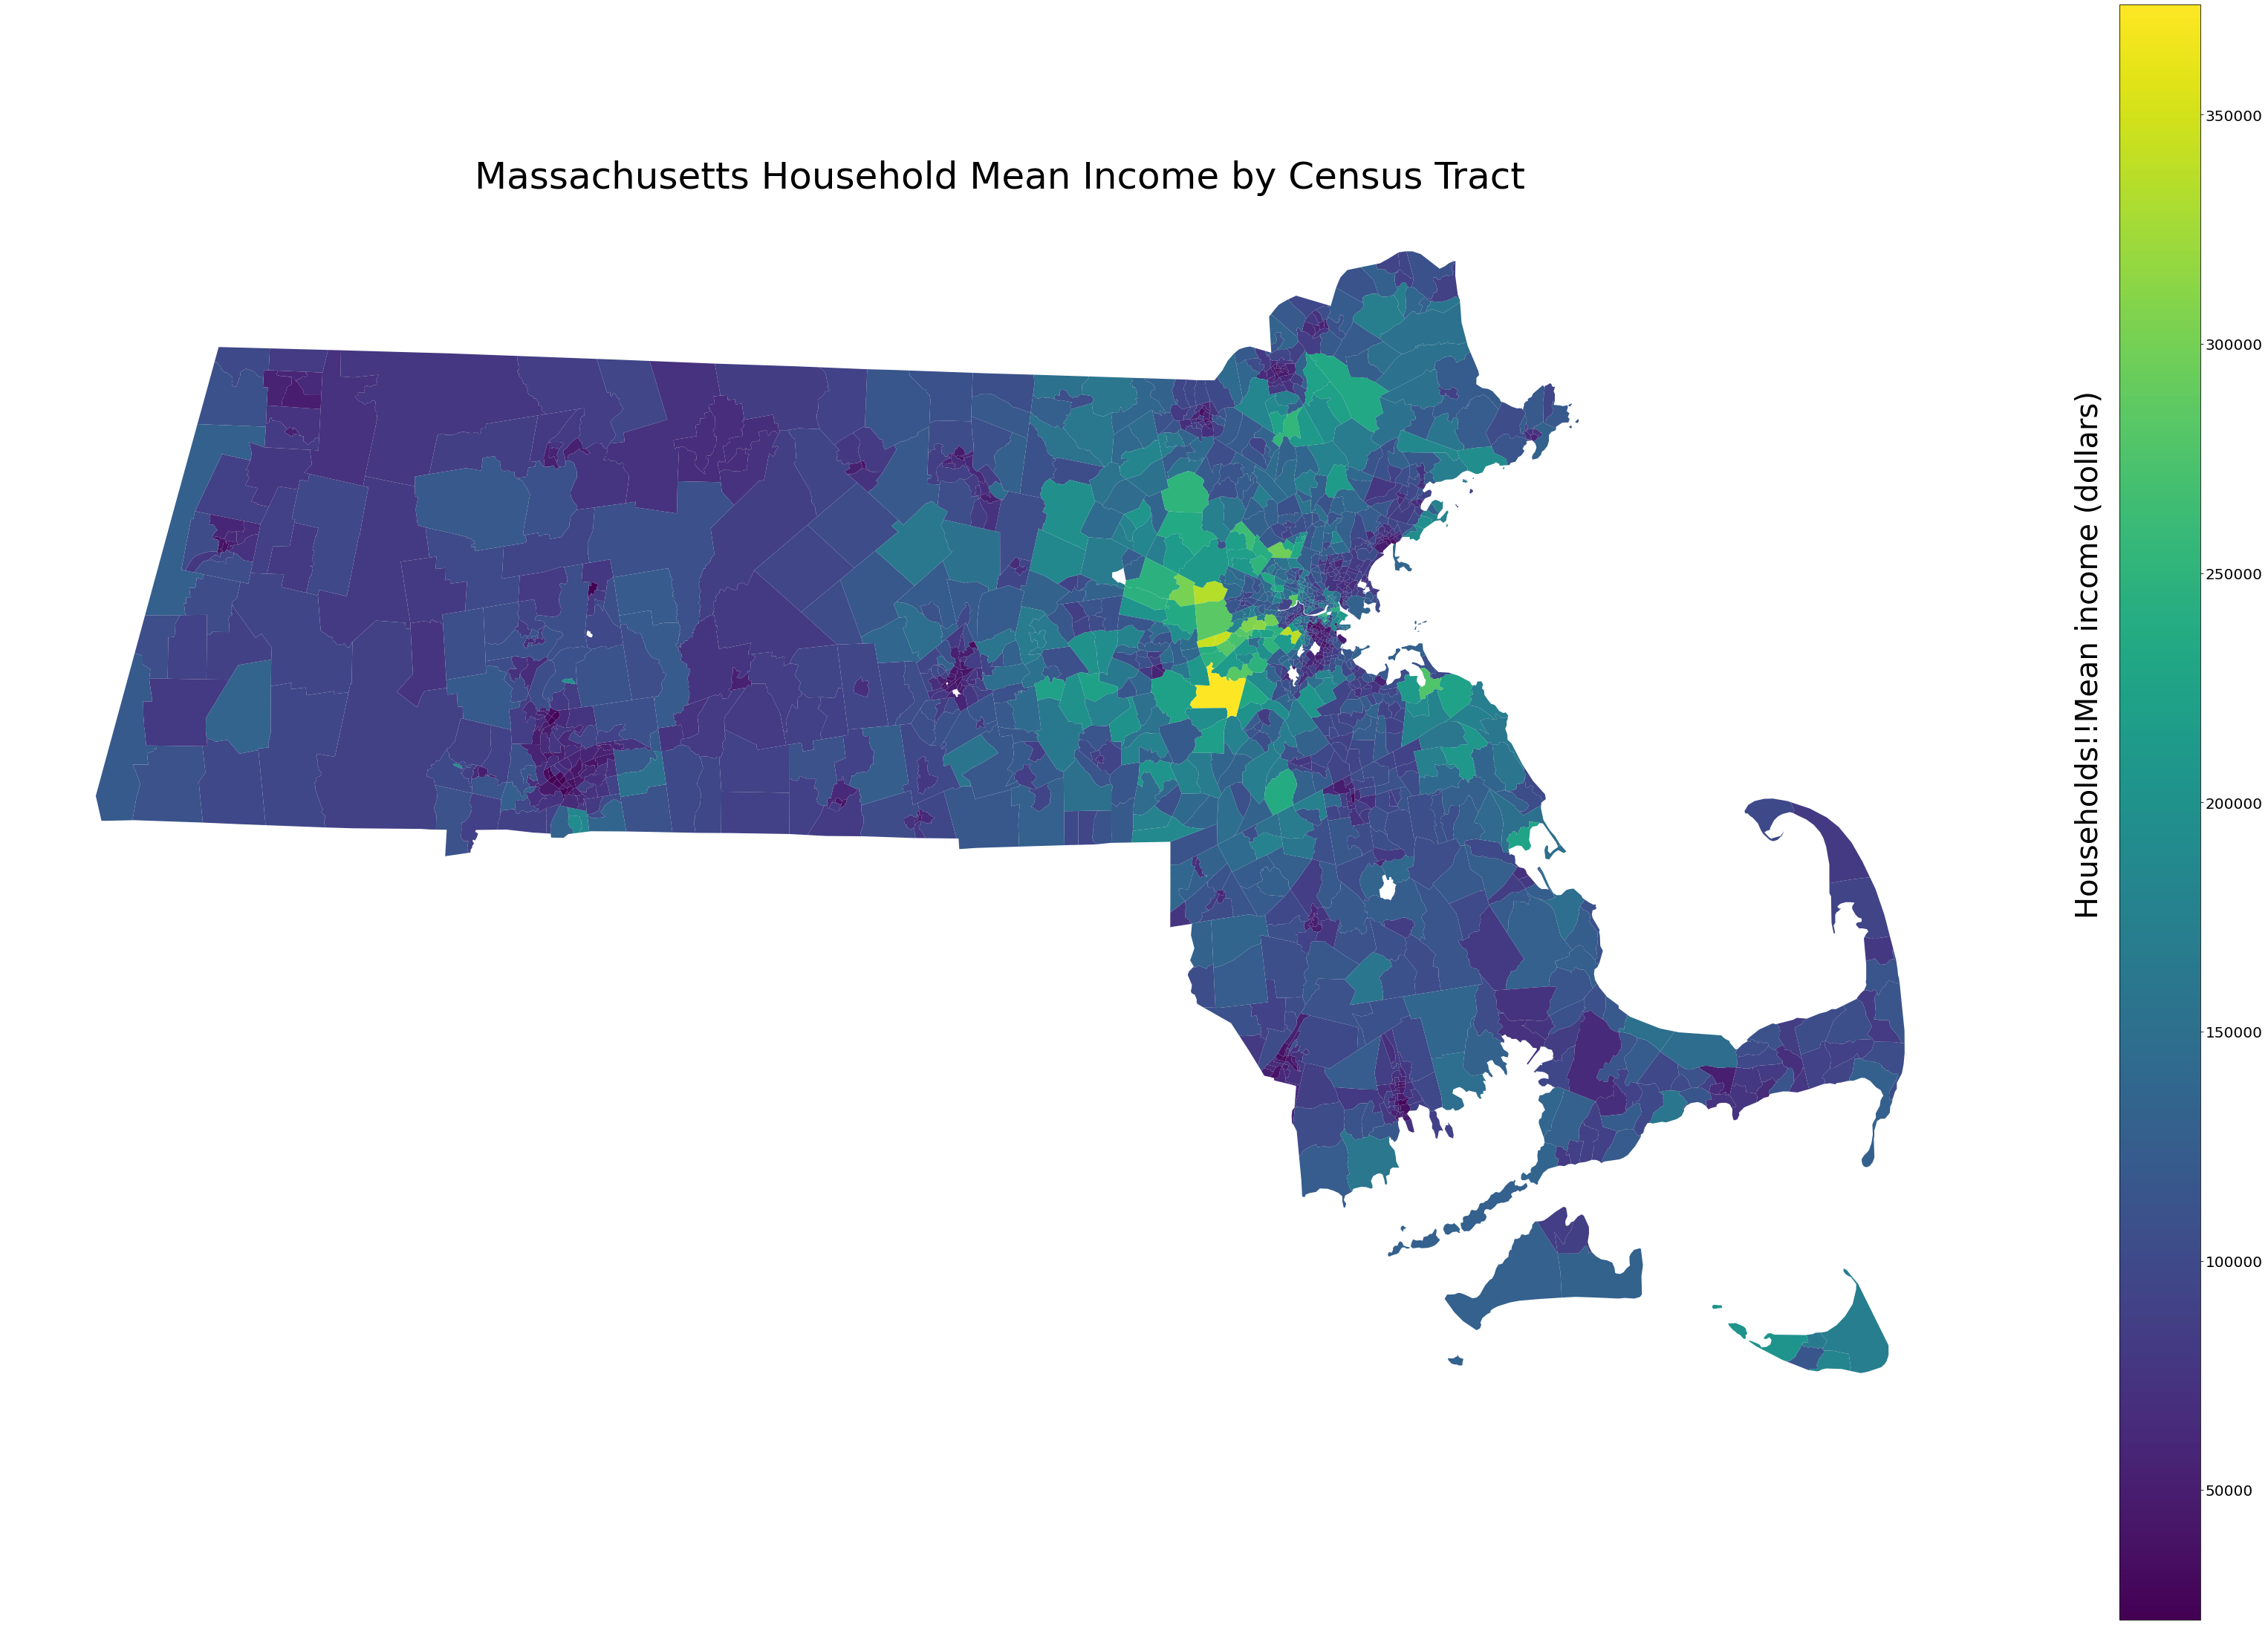

In [105]:
ax = mass.plot(column='S1901_C01_013E', legend = True)
fig = ax.figure
color_bar = fig.axes[1]
color_bar.tick_params(labelsize=20)
#Bounds supplies information on the maximum and minimum values of the x-axis and y-axis of our plot.
bounds = mass.bounds.iloc[3]
minx = bounds["minx"]
miny = bounds["miny"]

# We use that information to place the text label for our legend
plt.text(minx + 1.5, miny - 0.5, 'Households!!Mean income (dollars)', fontsize=40, rotation=90, rotation_mode='anchor')
plt.title('Massachusetts Household Mean Income by Census Tract', fontsize = 50)
plt.axis('off')
plt.savefig('./census_tract_data/Income/mean_income.jpg')

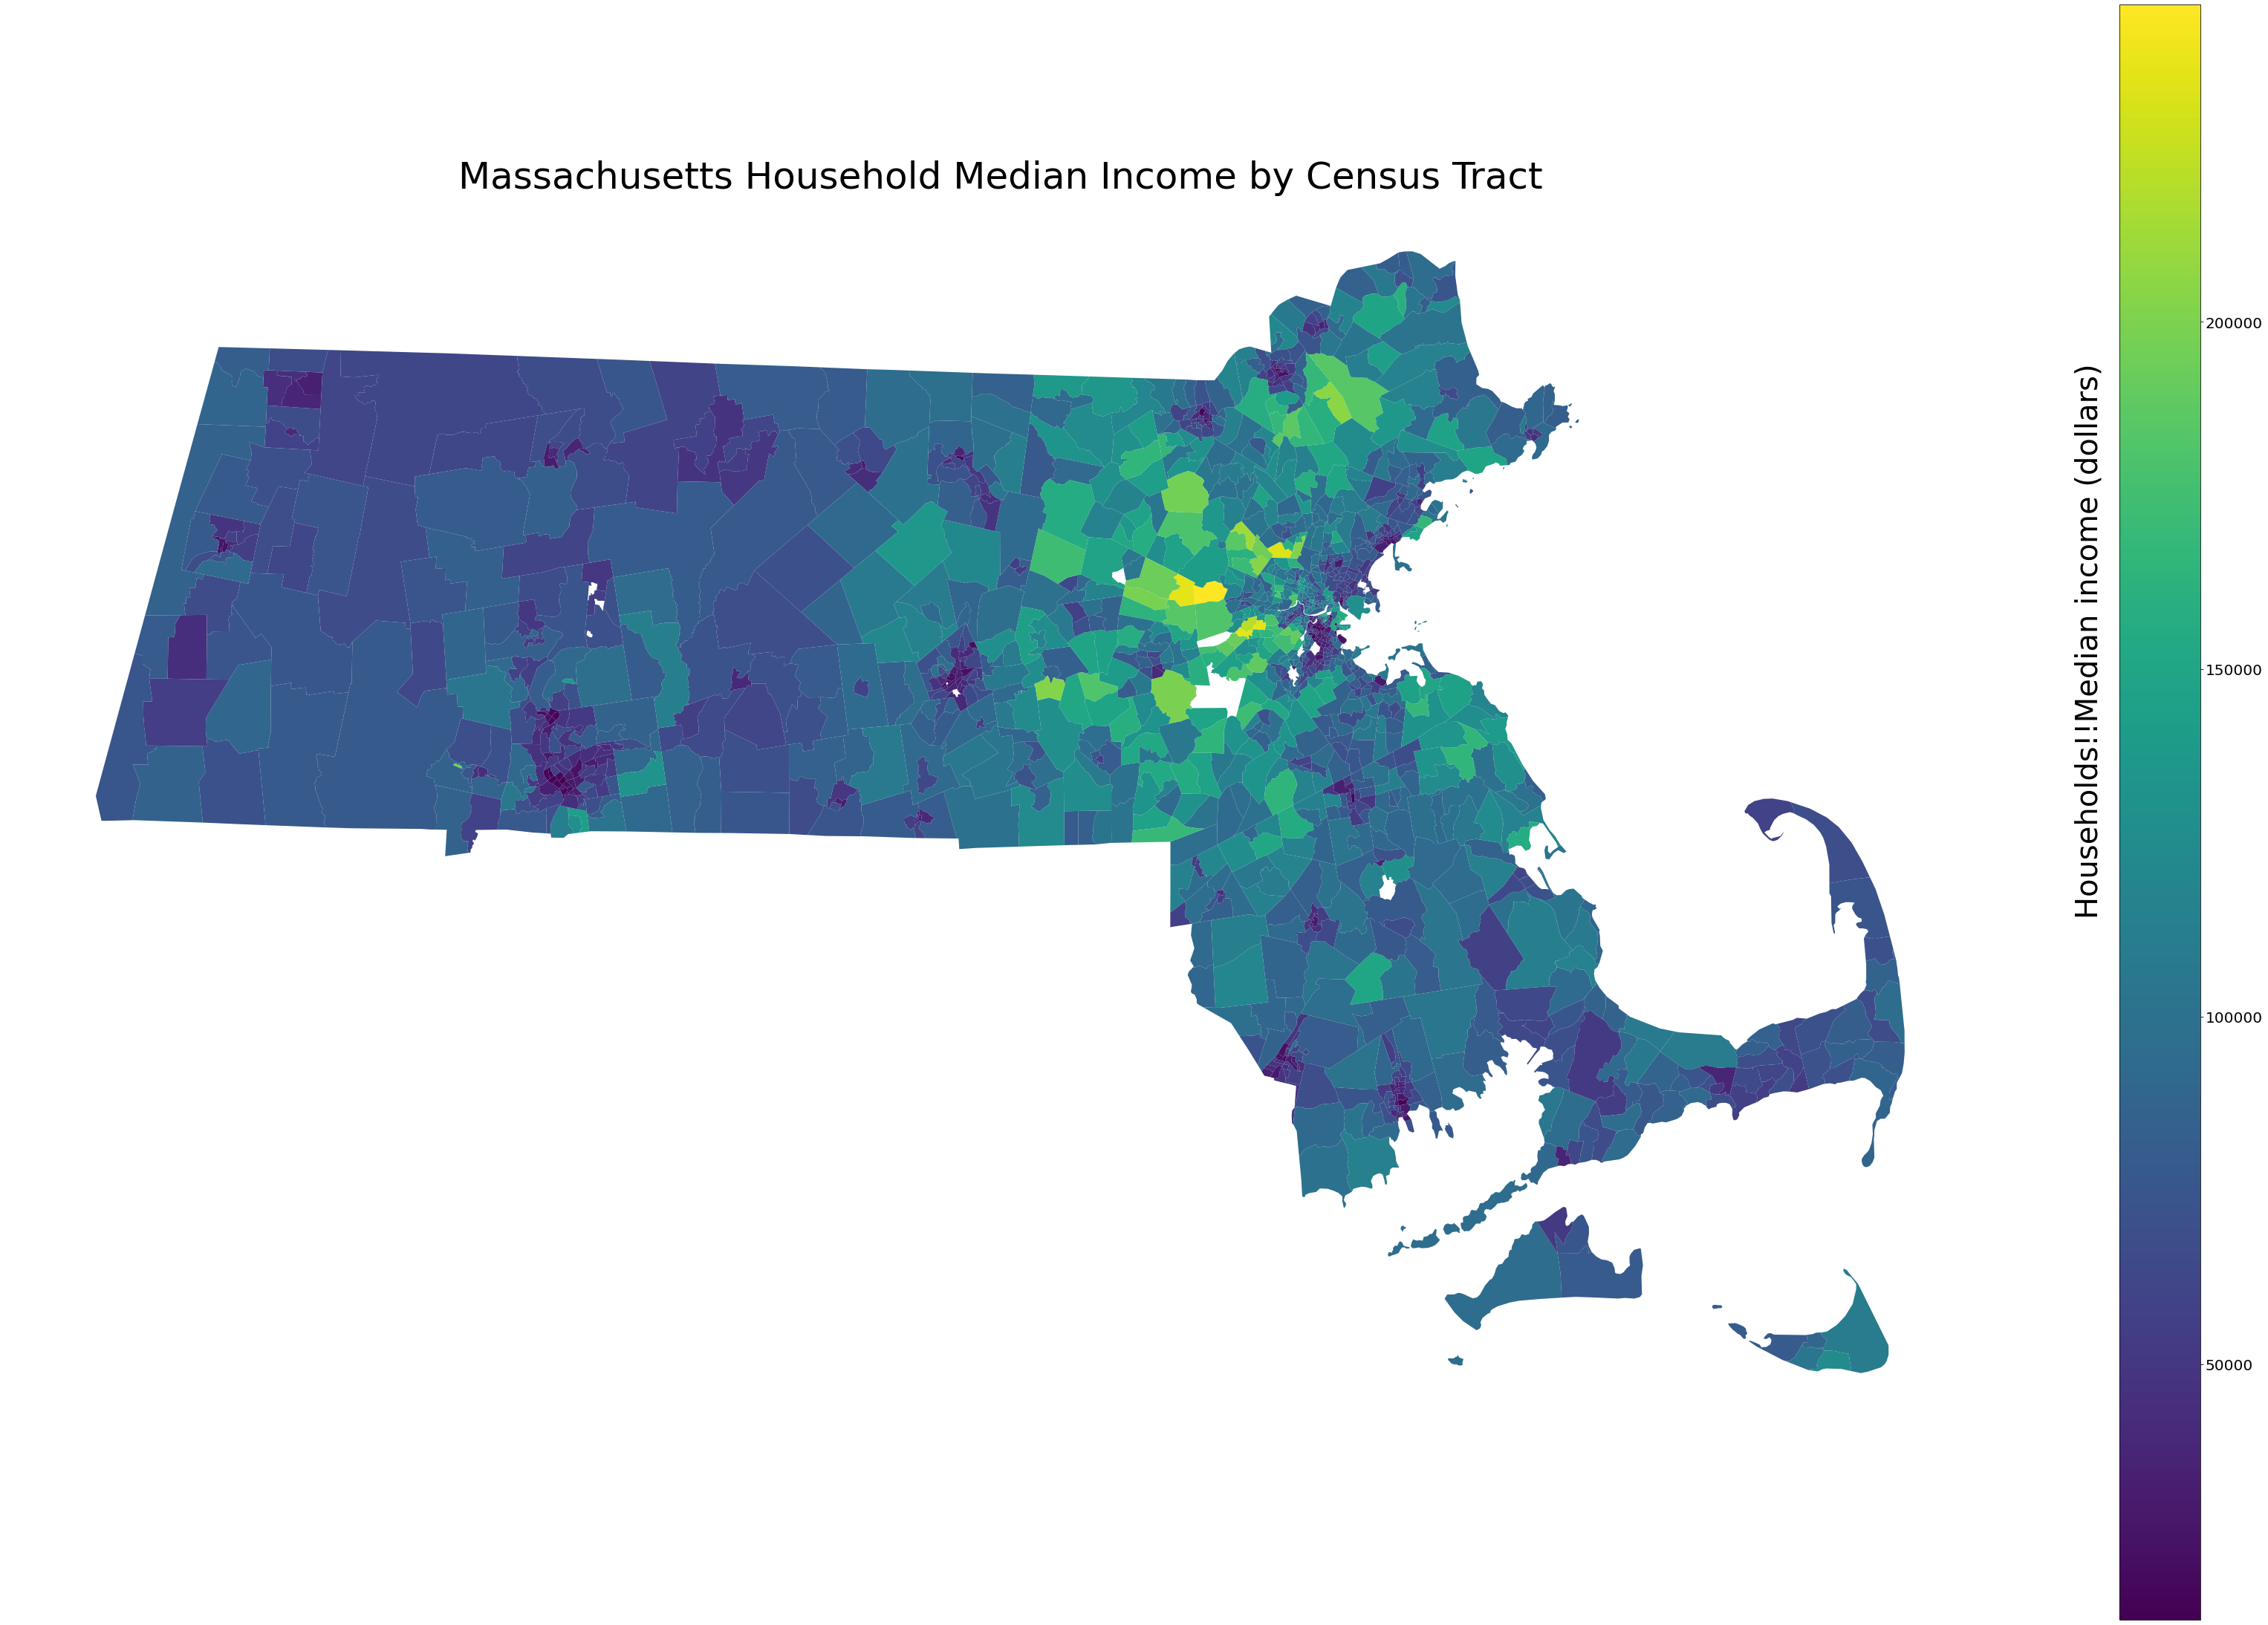

In [106]:
ax = mass.plot(column='S1901_C01_012E', legend = True)
fig = ax.figure
color_bar = fig.axes[1]
color_bar.tick_params(labelsize=20)
#Bounds supplies information on the maximum and minimum values of the x-axis and y-axis of our plot.
bounds = mass.bounds.iloc[3]
minx = bounds["minx"]
miny = bounds["miny"]

# We use that information to place the text label for our legend
plt.text(minx + 1.5, miny - 0.5, 'Households!!Median income (dollars)', fontsize=40, rotation=90, rotation_mode='anchor')
plt.title('Massachusetts Household Median Income by Census Tract', fontsize = 50)
plt.axis('off');
plt.savefig('./census_tract_data/Income/median_income.jpg')